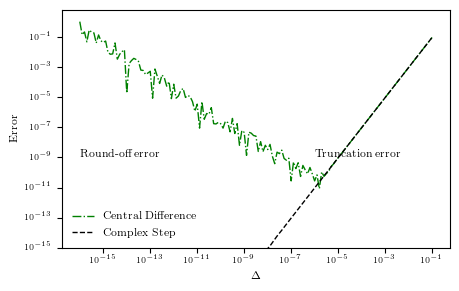

In [7]:
# Truncarion and round-off errors due to the dfinite difference approxiamtion


central_difference_approx(f,x0,h) = (f(x0+h)-f(x0-h))/(2.0*h)  
complex_step_approx(f,x0,h) = imag(f(x0+h.*im))/h


step_size_array = map((i) -> 10^i,range(-16.0,stop = -1.0,step = 0.1));
f(x)  =  sin(x^3) 
f_x(x) = cos(x^3)* 3x^2
x0 = 1.0;

cd = abs.(central_difference_approx.(f, x0, step_size_array).-f_x(x0))
cs = abs.(complex_step_approx.(f, x0, step_size_array).-f_x(x0))

using PyPlot

# width as measured in inkscape
width = 5
height = width/1.618
figure(figsize=(width,height)) 
plt.rc("font", family="serif")
plt.rc("text", usetex=true)
plt.rc("xtick", labelsize=6)
plt.rc("ytick", labelsize=6)
plt.rc("axes", labelsize=8)



clf()


fc_fig, = loglog(step_size_array,cd,color="green",linewidth=1,linestyle="-.");
fcs_fig, = loglog(step_size_array,cs,color="black",linewidth=1,linestyle="--");


gca().set_ylim([10^-15,0])


legend((fc_fig,fcs_fig),("Central Difference","Complex Step"), 
    loc = 0,frameon = false,fontsize = 8)
xlabel(L"$\Delta$",fontsize=8); ylabel("Error");
text(10^-16, 10^-9, " Round-off error",fontsize = 8)
text(10^-6, 10^-9, "Truncation error",fontsize = 8)

savefig("fd_error_types.pdf")